#**Data Exploration**

## Importing Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('99053_AllData.csv')

pd.set_option('display.max_rows', 120)

## Some data cleaning

Change all missing or NA values to numpy nan

In [4]:
data.replace(' ', np.nan, inplace=True)
data.replace('-9', np.nan, inplace=True)
data.replace('-1', np.nan, inplace=True)

Converting object type to float

In [5]:
data.dtypes

    # data types that need to change from object to float
    # AGE0, INTDAY7, AGE7,INTDAY10, AGE10, P_STRESS, BMI0, BMI7, BMI10

data[['AGE0', 'INTDAY7', 'AGE7','INTDAY10', 'AGE10', 'P_STRESS', 'BMI0', 'BMI7', 'BMI10']] = data[['AGE0', 'INTDAY7', 'AGE7','INTDAY10', 'AGE10', 'P_STRESS', 'BMI0', 'BMI7', 'BMI10']].astype(float)

Adding a race column to combine Japanese and Chinese to Asian, rewriting Ethnic categories to show Ethnicity name instead of data code

In [6]:
data['RACE'] = data.ETHNIC.map({1:'Black', 8:'Asian', 9:'Asian', 10:'Caucasian', 13:'Hispanic'})
data['ETHNIC_CAT'] = data.ETHNIC.map({1:'Black', 8:'Japanese', 9:'Chinese', 10:'Caucasian', 13:'Hispanic'})

##Handling Null Values

dot dot dot

In [40]:
data.isnull().sum()

SWANID                0
AGE0                  5
COURTES0             12
RESPECT0             13
POORSER0              8
NOTSMAR0             10
AFRAIDO0              9
DISHONS0             10
BETTER0               8
INSULTE0              9
HARASSE0              8
IGNORED0              8
DISC_AVGSCORE0        6
DISC_SUMSCORE0        0
MAINREA0           1791
RACE_REASON0       1788
INTDAY7             982
AGE7                982
COURTES7           1146
RESPECT7           1147
POORSER7           1146
NOTSMAR7           1146
AFRAIDO7           1146
DISHONS7           1146
BETTER7            1146
INSULTE7           1146
HARASSE7           1146
IGNORED7           1146
DISC_AVGSCORE7     1147
DISC_SUMSCORE7     1147
BCRACE7            2330
BCETHN7            2330
BCGENDR7           2329
BCAGE7             2329
BCINCML7           2329
BCLANG7            2330
BCWGHT7            2330
BCPHAPP7           2329
BCORIEN7           2329
OTHEREX7           2329
RACE_REASON7       2297
INTDAY10        

In [14]:
covariate[covariate.P_STRESS.isnull() == True].RACE.value_counts()

Caucasian    37
Asian        35
Hispanic     20
Black        16
dtype: int64

In [15]:
# Need to figure out how to handle null values
## data.dropna()            drops a row if any values are null
## data.dropna(how='all')   drops a row only if all values are null
## data.dropna(subset = ['col1', 'col2', 'col4'])       # drops a row if col 1, 2, and 4 are null

# Descriptive Analysis

In [7]:
covariate_cols = ['P_STRESS','INCOME0','DEGREE','PHY_ACT_COV','BMI0','ETHNIC', 'RACE','ETHNIC_CAT','AGE0']
covariate = data[covariate_cols]

##Perceived Stress

Examining frequencies of Perceived Stress values. P_STRESS is measured from 4-20, with 20 indicating high perceived stress. There are 108 null values.

In [8]:
covariate.P_STRESS.value_counts(sort=False, dropna=False)

NaN    108
 4     255
 5     277
 6     365
 7     342
 8     409
 9     344
 10    346
 11    249
 12    331
 13    121
 14     66
 15     30
 16     33
 17     15
 18      9
 19      2
dtype: int64

The average perceived stress score is 8.6. Perceived stress scores are skewed to the left, as seen visually in the below bar and box plots. 

In [9]:
covariate.P_STRESS.describe()

count    3194.000000
mean        8.596744
std         2.952946
min         4.000000
25%         6.000000
50%         8.000000
75%        11.000000
max        19.000000
Name: P_STRESS, dtype: float64

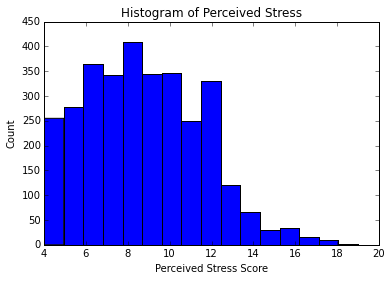

In [10]:
covariate.P_STRESS.plot(kind = 'hist', bins = 16, title='Histogram of Perceived Stress')
plt.xlabel('Perceived Stress Score')
plt.ylabel('Count')

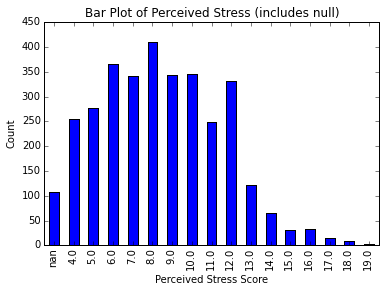

In [11]:
covariate.P_STRESS.value_counts(sort=False, dropna=False).plot(kind='bar', title='Bar Plot of Perceived Stress (includes null)')
plt.xlabel('Perceived Stress Score')
plt.ylabel('Count')

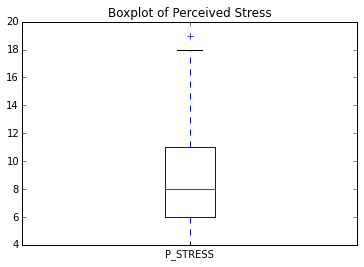

In [12]:
covariate.P_STRESS.plot(kind='box', title='Boxplot of Perceived Stress')

##Ethnicity
*note: the next couple cells will be repeated for race*

In [16]:
covariate.ETHNIC_CAT.value_counts(ascending=True, dropna=False)

Japanese      250
Chinese       281
Hispanic      285
Black         935
Caucasian    1551
dtype: int64

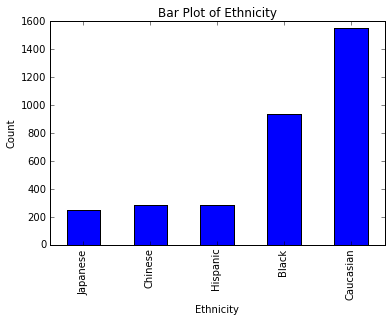

In [17]:
covariate.ETHNIC_CAT.value_counts(ascending=True, sort=True, dropna=False).plot(kind='bar', title='Bar Plot of Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')

**Ethnicity and Perceived Stress**

In [18]:
 covariate.groupby('ETHNIC_CAT').P_STRESS.describe()

ETHNIC_CAT       
Black       count     919.000000
            mean        8.491839
            std         3.086214
            min         4.000000
            25%         6.000000
            50%         8.000000
            75%        11.000000
            max        19.000000
Caucasian   count    1514.000000
            mean        8.435271
            std         2.900892
            min         4.000000
            25%         6.000000
            50%         8.000000
            75%        10.000000
            max        19.000000
Chinese     count     266.000000
            mean        8.770677
            std         2.692415
            min         4.000000
            25%         7.000000
            50%         9.000000
            75%        10.000000
            max        18.000000
Hispanic    count     265.000000
            mean       10.067925
            std         3.030637
            min         4.000000
            25%         8.000000
            50%        11

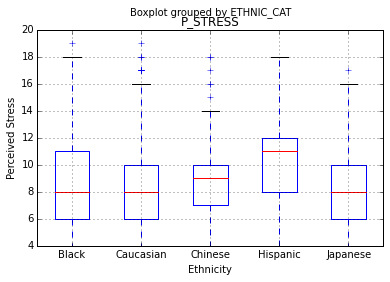

In [19]:
covariate.boxplot(column='P_STRESS', by = 'ETHNIC_CAT')
plt.xlabel('Ethnicity')
plt.ylabel('Perceived Stress')

**Ethnicity and Age**

In [20]:
covariate.ETHNIC_CAT.isnull().sum()     # no null values hurrah!

0

In [21]:
 covariate.groupby('ETHNIC_CAT').AGE0.describe()

ETHNIC_CAT       
Black       count     934.000000
            mean       45.739829
            std         2.660049
            min        42.000000
            25%        43.250000
            50%        46.000000
            75%        48.000000
            max        53.000000
Caucasian   count    1549.000000
            mean       45.834732
            std         2.706783
            min        42.000000
            25%        44.000000
            50%        46.000000
            75%        48.000000
            max        53.000000
Chinese     count     281.000000
            mean       46.153025
            std         2.670219
            min        42.000000
            25%        44.000000
            50%        46.000000
            75%        48.000000
            max        52.000000
Hispanic    count     283.000000
            mean       45.855124
            std         2.791235
            min        42.000000
            25%        44.000000
            50%        46

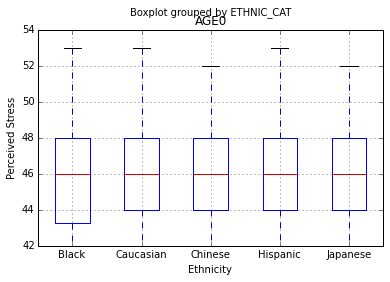

In [22]:
covariate.boxplot(column='AGE0', by = 'ETHNIC_CAT')
plt.xlabel('Ethnicity')
plt.ylabel('Perceived Stress')

**Ethnicity and Education**

In [23]:
 covariate.groupby('ETHNIC_CAT').DEGREE.value_counts(ascending=True, sort=False, dropna=False)

ETHNIC_CAT     
Black       NaN     11
            1       52
            3      376
            2      197
            5      153
            4      146
Caucasian   NaN     11
            2      227
            4      337
            1       23
            3      472
            5      481
Chinese     1        2
            3       97
            2       49
            5       47
            4       86
Hispanic    NaN      9
            1      129
            3       52
            2       68
            5        7
            4       20
Japanese    1       32
            3       54
            2       40
            5       52
            4       72
dtype: int64

In [24]:
covariate.groupby('DEGREE').ETHNIC_CAT.value_counts(ascending=True, sort=True, dropna=False)

DEGREE           
1       Chinese        2
        Caucasian     23
        Japanese      32
        Black         52
        Hispanic     129
2       Japanese      40
        Chinese       49
        Hispanic      68
        Black        197
        Caucasian    227
3       Hispanic      52
        Japanese      54
        Chinese       97
        Black        376
        Caucasian    472
4       Hispanic      20
        Japanese      72
        Chinese       86
        Black        146
        Caucasian    337
5       Hispanic       7
        Chinese       47
        Japanese      52
        Black        153
        Caucasian    481
dtype: int64

##Race

Of the 3,302 participants, nearly half are Caucasian. The next largest racial group is Black (28.3%), then Asians (16.1%), and Hispanics (8.6%).

In [29]:
covariate.RACE.value_counts(ascending=True, dropna=False)

Hispanic      285
Asian         531
Black         935
Caucasian    1551
dtype: int64

In [30]:
covariate.RACE.value_counts(ascending=True, dropna=False)/len(covariate.RACE)*100

Hispanic      8.631133
Asian        16.081163
Black        28.316172
Caucasian    46.971532
dtype: float64

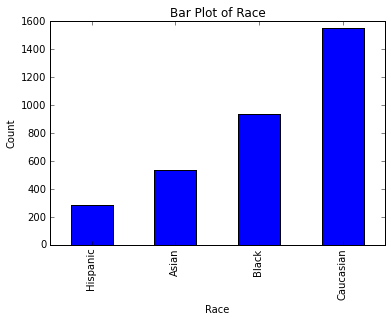

In [31]:
covariate.RACE.value_counts(ascending=True, sort=True, dropna=False).plot(kind='bar', title='Bar Plot of Race')
plt.xlabel('Race')
plt.ylabel('Count')

**Race and Perceived Stress**

Overall, Hispanics have the highest average perceived stress score (10.1). Blacks and Caucasians have similar average perceived stress scores, but Black perceived stress scores skew to the right. 

In [34]:
 covariate.groupby('RACE').P_STRESS.describe()

RACE            
Asian      count     496.000000
           mean        8.497984
           std         2.587459
           min         4.000000
           25%         7.000000
           50%         9.000000
           75%        10.000000
           max        18.000000
Black      count     919.000000
           mean        8.491839
           std         3.086214
           min         4.000000
           25%         6.000000
           50%         8.000000
           75%        11.000000
           max        19.000000
Caucasian  count    1514.000000
           mean        8.435271
           std         2.900892
           min         4.000000
           25%         6.000000
           50%         8.000000
           75%        10.000000
           max        19.000000
Hispanic   count     265.000000
           mean       10.067925
           std         3.030637
           min         4.000000
           25%         8.000000
           50%        11.000000
           75%        1

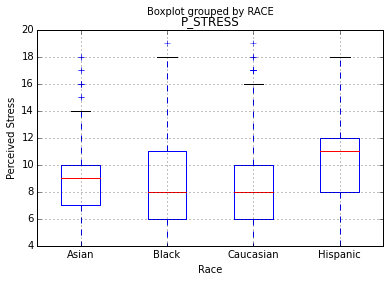

In [37]:
covariate.boxplot(column='P_STRESS', by = 'RACE')
plt.xlabel('Race')
plt.ylabel('Perceived Stress')

**Race and Age**

In [38]:
 covariate.groupby('RACE').AGE0.describe()

RACE            
Asian      count     531.000000
           mean       46.082863
           std         2.626553
           min        42.000000
           25%        44.000000
           50%        46.000000
           75%        48.000000
           max        52.000000
Black      count     934.000000
           mean       45.739829
           std         2.660049
           min        42.000000
           25%        43.250000
           50%        46.000000
           75%        48.000000
           max        53.000000
Caucasian  count    1549.000000
           mean       45.834732
           std         2.706783
           min        42.000000
           25%        44.000000
           50%        46.000000
           75%        48.000000
           max        53.000000
Hispanic   count     283.000000
           mean       45.855124
           std         2.791235
           min        42.000000
           25%        44.000000
           50%        46.000000
           75%        4

In [ ]:
covariate.boxplot(column='AGE0', by = 'RACE')
plt.xlabel('Race')
plt.ylabel('Age at Baseline')

**Race and Education**

In [ ]:
 covariate.groupby('RACE').DEGREE.value_counts(ascending=True, sort=False, dropna=False)

In [ ]:
covariate.groupby('DEGREE').RACE.value_counts(ascending=True, sort=True, dropna=False)